In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

### After PageRank approch, having list of users in descending PageRank values, start here

In [2]:
login_list = ['torvalds',
 'JakeWharton',
 'Tj',
 'mojombo',
 'gaearon',
 'paulirish',
 'addyosmani',
 'ruanyf',
 'yyx990803',
 'sindresorhus',
 'defunkt',
 'kennethreitz',
 'angusshire',
 'douglascrockford',
 'mbostock',
 'taylorotwell',
 'tpope',
 'jeresig',
 'fabpot',
 'mattt',
 'dhh',
 'mdo',
 'schacon',
 'karpathy',
 'jashkenas',
 'llSourcell',
 'getify',
 'daimajia',
 'substack',
 'jlord',
 'JeffreyWay',
 'ry',
 'ryanb',
 'pjhyett',
 'mrdoob',
 'michaelliao',
 'JacksonTian',
 'hadley',
 'mitsuhiko',
 'cusspvz',
 'StephenGrider',
 'cloudwu',
 'LeaVerou',
 'yinwang0',
 'josevalim',
 'wycats',
 'lifesinger',
 'johnpapa',
 'hakimel',
 'Trinea',
 'chrisbanes',
 'antirez',
 'tekkub',
 'clowwindy',
 'vczh',
 'laruence',
 'buckyroberts',
 'stormzhang',
 'alanhamlett',
 'tenderlove',
 'kelseyhightower',
 'phodal',
 'astaxie',
 'onevcat',
 'wesbos',
 '4148',
 'fat',
 'keijiro',
 'isaacs',
 'RubyLouvre',
 'romannurik',
 'feross',
 'ibireme',
 'jessfraz',
 'vim-scripts',
 'justjavac',
 'muan',
 'chriscoyier',
 'agentzh',
 'MichalPaszkiewicz',
 'BYVoid',
 'charliesome',
 'matz',
 'commonsguy',
 'laracasts',
 'sebastianbergmann',
 'mitchellh',
 'shiffman',
 'koush',
 'igrigorik',
 'nzakas',
 'sofish',
 'fouber',
 'hongyangAndroid',
 'holman',
 'unclebob',
 'necolas',
 'liaohuqiu',
 'PresidentObamaBot',
 'hackedteam']

In [3]:
def fetch_git_data_user(url):
    pages = []
    res=requests.get(url,headers={'Authorization': 'token ' + 'b499684ea402d0504e021498de8a7339edf095cf'})
    data=res.json()
    pages.append(data)
    #counter = 0
    #print (res.links.keys())
    while 'next' in res.links.keys():
        #counter += 1
        res = requests.get(res.links['next']['url'], headers={'Authorization': 'token ' + 'b499684ea402d0504e021498de8a7339edf095cf'})
        pages.append(res.json())
    #print(len(pages))
    return pages

In [4]:
full_user = []
for x in login_list:
    url = "https://api.github.com/users/"+str(x)
    full_user.append(fetch_git_data_user(url))

In [5]:
def get_user(result):
    user_all = pd.DataFrame()
    for x in result:
        user_all = user_all.append(x, ignore_index=True)
    return user_all

In [6]:
full_user_detail = get_user(full_user)

In [7]:
full_user_detail.columns

Index(['login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url',
       'html_url', 'followers_url', 'following_url', 'gists_url',
       'starred_url', 'subscriptions_url', 'organizations_url', 'repos_url',
       'events_url', 'received_events_url', 'type', 'site_admin', 'name',
       'company', 'blog', 'location', 'email', 'hireable', 'bio',
       'public_repos', 'public_gists', 'followers', 'following', 'created_at',
       'updated_at'],
      dtype='object')

In [8]:
full_user_detail[['login','followers','following','public_repos','public_gists']].tail()

,login,followers,following,public_repos,public_gists
95,unclebob,7337,0,42,31
96,necolas,8011,28,69,42
97,liaohuqiu,8187,228,126,6
98,PresidentObamaBot,3310,0,0,0
99,hackedteam,5278,0,53,0


In [9]:
full_user_detail.describe()

,id,public_repos,public_gists,followers,following
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,1.502786e+06,171.170000,118.220000,16182.420000,4360.270000
std,5.248176e+06,533.788443,206.580509,14226.553817,27111.860576
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.535900e+04,33.000000,9.000000,8337.500000,1.000000
50%,1.870345e+05,64.000000,41.500000,12516.500000,21.500000
75%,8.176492e+05,147.750000,121.750000,17774.000000,75.750000
max,4.839632e+07,5208.000000,1185.000000,105277.000000,229783.000000


## Finding Users joining date at GitHub (created_at)

In [15]:
full_user_detail['year'] = full_user_detail['created_at'].map(lambda x: int(x[0:4]))

In [16]:
full_user_detail[['login','year']].head()

,login,year
0,torvalds,2011
1,JakeWharton,2009
2,tj,2008
3,mojombo,2007
4,gaearon,2011


In [17]:
full_user_detail[['login','followers','following','public_repos','year']].to_excel('File User PageRank.xlsx', index=False)

## Sorting Users by number of followers

In [18]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)
sorted_user_by_follower.head()

,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,...,email,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,year
0,torvalds,1024025,MDQ6VXNlcjEwMjQwMjU=,https://avatars0.githubusercontent.com/u/10240...,,https://api.github.com/users/torvalds,https://github.com/torvalds,https://api.github.com/users/torvalds/followers,https://api.github.com/users/torvalds/followin...,https://api.github.com/users/torvalds/gists{/g...,...,None,None,None,6,0,105277,0,2011-09-03T15:26:22Z,2019-12-28T20:45:15Z,2011
7,ruanyf,905434,MDQ6VXNlcjkwNTQzNA==,https://avatars0.githubusercontent.com/u/90543...,,https://api.github.com/users/ruanyf,https://github.com/ruanyf,https://api.github.com/users/ruanyf/followers,https://api.github.com/users/ruanyf/following{...,https://api.github.com/users/ruanyf/gists{/gis...,...,yifeng.ruan@gmail.com,None,None,62,26,58191,0,2011-07-10T01:07:17Z,2020-01-09T23:42:52Z,2011
1,JakeWharton,66577,MDQ6VXNlcjY2NTc3,https://avatars0.githubusercontent.com/u/66577...,,https://api.github.com/users/JakeWharton,https://github.com/JakeWharton,https://api.github.com/users/JakeWharton/follo...,https://api.github.com/users/JakeWharton/follo...,https://api.github.com/users/JakeWharton/gists...,...,jakewharton@gmail.com,None,None,99,54,56035,12,2009-03-24T16:09:53Z,2020-01-14T18:12:23Z,2009
8,yyx990803,499550,MDQ6VXNlcjQ5OTU1MA==,https://avatars1.githubusercontent.com/u/49955...,,https://api.github.com/users/yyx990803,https://github.com/yyx990803,https://api.github.com/users/yyx990803/followers,https://api.github.com/users/yyx990803/followi...,https://api.github.com/users/yyx990803/gists{/...,...,None,None,"Creator of @vuejs, previously @meteor & @google",153,65,54043,93,2010-11-28T01:05:40Z,2020-01-14T15:57:01Z,2010
4,gaearon,810438,MDQ6VXNlcjgxMDQzOA==,https://avatars0.githubusercontent.com/u/81043...,,https://api.github.com/users/gaearon,https://github.com/gaearon,https://api.github.com/users/gaearon/followers,https://api.github.com/users/gaearon/following...,https://api.github.com/users/gaearon/gists{/gi...,...,dan.abramov@me.com,None,Working on @reactjs. Co-author of Redux and Cr...,239,70,51842,171,2011-05-25T18:18:31Z,2019-12-25T14:30:42Z,2011


## Plots

## Graph for Research Report

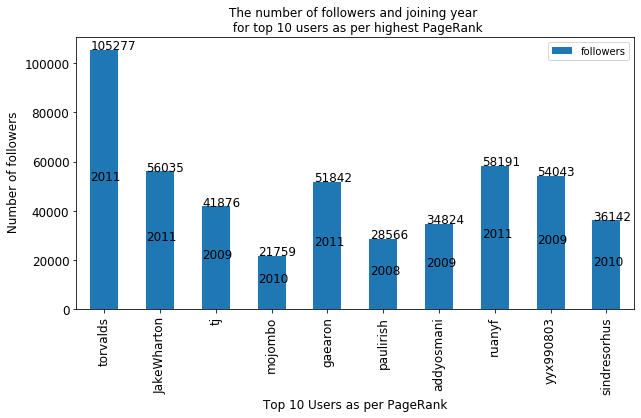

In [39]:
from matplotlib.pyplot import *
%matplotlib inline
 
ax = full_user_detail.head(10)[['followers']].plot(kind='bar', title ="The number of followers and joining year \n for top 10 users as per highest PageRank", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xticklabels(full_user_detail.head(10)['login'])
ax.set_xlabel("Top 10 Users as per PageRank", fontsize=12)
ax.set_ylabel(" Number of followers", fontsize=12)
bar_label = list(sorted_user_by_follower['year'].head(10))

i=0
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.002, p.get_height() * 1.005),fontsize=12)
    ax.annotate(str(bar_label[i]), (p.get_x() * 1.002, p.get_height()/2),fontsize=12)
    i+=1

plt.savefig('highfol.png', format='png', dpi=600,  bbox_inches = 'tight')
plt.show()

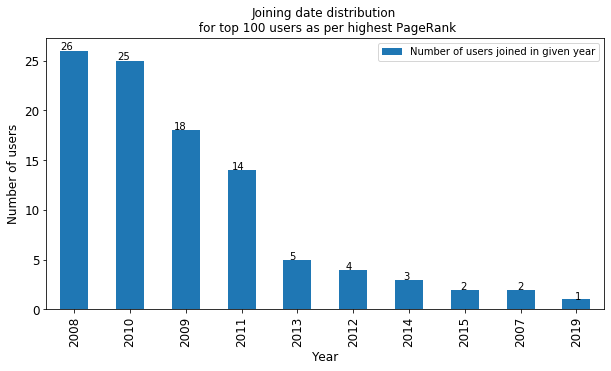

In [40]:
ax = full_user_detail['year'].value_counts().plot(kind='bar', title ="Joining date distribution \n for top 100 users as per highest PageRank", figsize=(10, 5), label='Number of users joined in given year', legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of users", fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.005))
plt.savefig('highfolyear.png', format='png', dpi=600,  bbox_inches = 'tight')
plt.show()

###  User Data collection for follower count

In [42]:
def fetch_git_data(url):
    pages = []
    res=requests.get(url,headers={'Authorization': 'token ' + 'b499684ea402d0504e021498de8a7339edf095cf', 'Accept': 'application/vnd.github.squirrel-girl-preview+json'})
    data=res.json()
    pages.append(data)
    #counter = 0
    #print (res.links.keys())
    while 'next' in res.links.keys():
        #counter += 1
        res = requests.get(res.links['next']['url'], headers={'Authorization': 'token ' + 'b499684ea402d0504e021498de8a7339edf095cf', 'Accept': 'application/vnd.github.squirrel-girl-preview+json'})
        pages.append(res.json())
    #print(len(pages))
    return pages

# User 

In [43]:
#url = "https://api.github.com/search/users?q=repos:%3E5+followers:%3E1000"
url = "https://api.github.com/search/users?q=followers:%3E1000&per_page=100"
data = fetch_git_data(url)
print ('done')

done


In [44]:
df = pd.DataFrame(data)
df

,total_count,incomplete_results,items
0,2165,False,"[{'login': 'torvalds', 'id': 1024025, 'node_id..."
1,2165,False,"[{'login': 'wesm', 'id': 329591, 'node_id': 'M..."
2,2165,False,"[{'login': 'notwaldorf', 'id': 1369170, 'node_..."
3,2165,False,"[{'login': 'tylermcginnis', 'id': 2933430, 'no..."
4,2165,False,"[{'login': 'Blankj', 'id': 17978187, 'node_id'..."
5,2165,False,"[{'login': 'hunkim', 'id': 901975, 'node_id': ..."
6,2165,False,"[{'login': 'madrobby', 'id': 3390, 'node_id': ..."
7,2165,False,"[{'login': 'freekmurze', 'id': 483853, 'node_i..."
8,2165,False,"[{'login': 'chyyuu', 'id': 2077445, 'node_id':..."
9,2165,False,"[{'login': 'j2kun', 'id': 2467754, 'node_id': ..."


In [45]:
def get_user(df):
    users = pd.DataFrame()
    for y in df['items']:
        x = list(y)
        users = users.append(x, ignore_index=True)
    return users

In [46]:
users = get_user(df)

In [47]:
users.columns

Index(['login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url',
       'html_url', 'followers_url', 'following_url', 'gists_url',
       'starred_url', 'subscriptions_url', 'organizations_url', 'repos_url',
       'events_url', 'received_events_url', 'type', 'site_admin', 'score'],
      dtype='object')

### Jump to Popular user's repository count

In [21]:
sorted_user_by_follower[['login','followers']].to_excel(r'File User without normalize.xlsx', index=False)

## Normalize Followers

In [22]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)

In [23]:
sorted_user_by_follower[['login','followers']].to_excel(r'File followers without Normalized.xlsx', index=False)

In [24]:
sorted_user_by_follower['followers'] = (sorted_user_by_follower['followers']-min(sorted_user_by_follower['followers']))/(max(sorted_user_by_follower['followers'])-min(sorted_user_by_follower['followers']))

In [25]:
sorted_user_by_follower[['login','followers']].head(100).to_excel(r'File follower Normalized.xlsx', index=False)

## Normalize Repositories

In [11]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)

In [31]:
sorted_user_by_follower[['login','public_repos']].to_excel(r'File Repos without Normalized.xlsx', index=False)

In [37]:
sorted_user_by_follower['public_repos'] = (sorted_user_by_follower['public_repos'].head(100)-min(sorted_user_by_follower['public_repos'].head(100)))/(max(sorted_user_by_follower['public_repos'].head(100))-min(sorted_user_by_follower['public_repos'].head(100)))

In [38]:
sorted_user_by_follower[['login','public_repos']].head(100).to_excel(r'File Repo Normalized.xlsx')

## Normalize Following

In [ ]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)
sorted_user_by_follower['following'] = sorted_user_by_follower['following'].head(100)/max(sorted_user_by_follower['following'].head(100))

In [ ]:
sorted_user_by_follower[['login','following']].head(100).to_excel(r'File Following.xlsx')

## Normalized

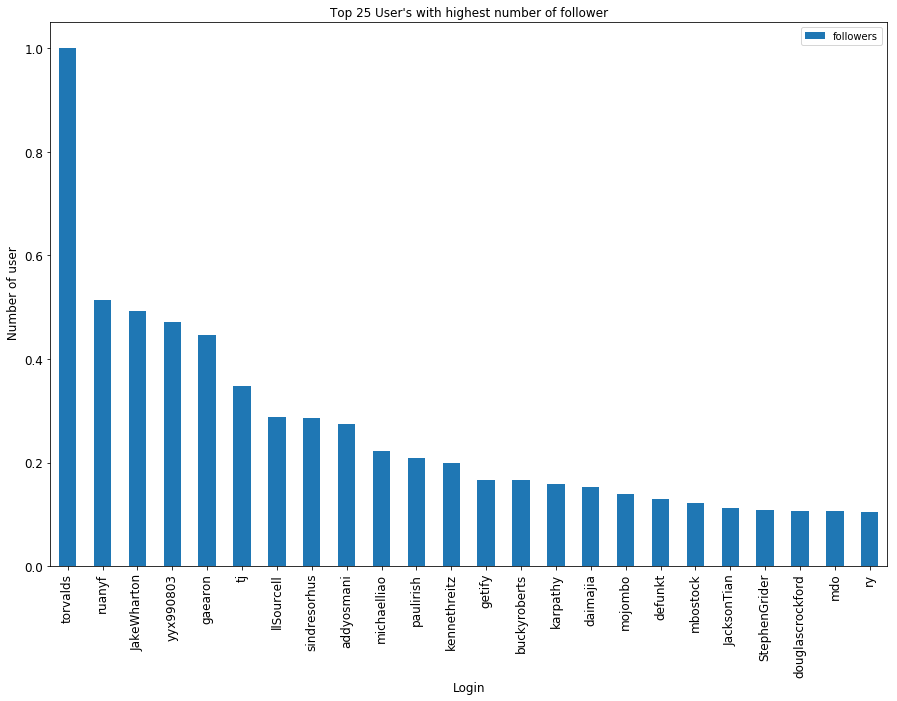

In [30]:
ax = full_user_detail.head(24)[['followers']].plot(kind='bar', title ="Top 25 User's with highest number of follower", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(full_user_detail.head(24)['login'])
ax.set_xlabel("Login", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
plt.show()

## Popular user's repository count

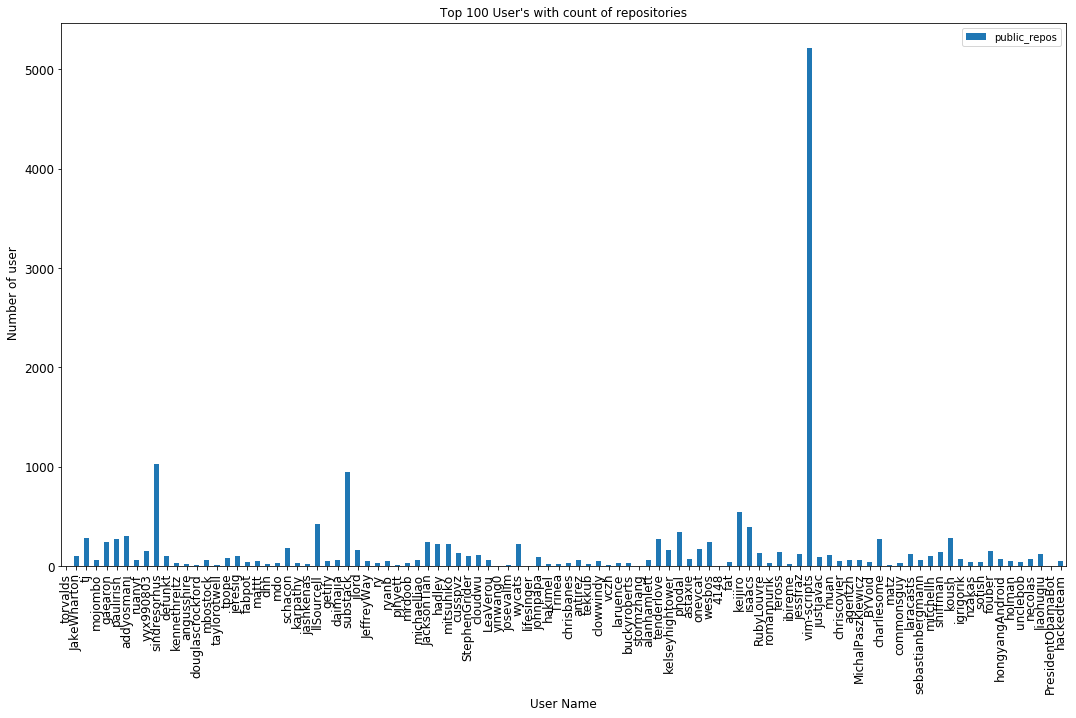

In [79]:
ax = full_user_detail[['public_repos']].plot(kind='bar', title ="Top 100 User's with count of repositories", figsize=(18, 10), legend=True, fontsize=12)
ax.set_xticklabels(full_user_detail['login'])
ax.set_xlabel("User Name", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
plt.show()

## Popular User's Following pattern

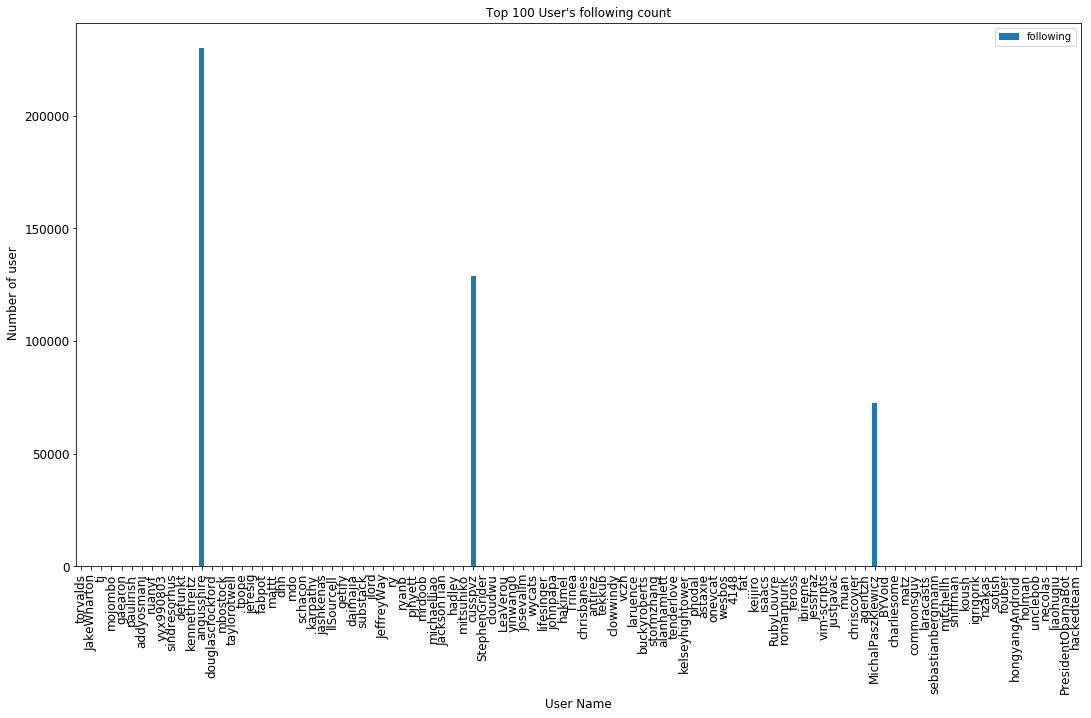

In [81]:
ax = full_user_detail[['following']].plot(kind='bar', title ="Top 100 User's following count", figsize=(18, 10), legend=True, fontsize=12)
ax.set_xticklabels(full_user_detail['login'])
ax.set_xlabel("User Name", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
plt.show()

#### * Above graph explains the behaviour of following by popular user's on github.
#### * It clearly explains that most (influencer or popular) users don't follow a lot of users.

## Distriution of Followers 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B30601A240>]],
      dtype=object)

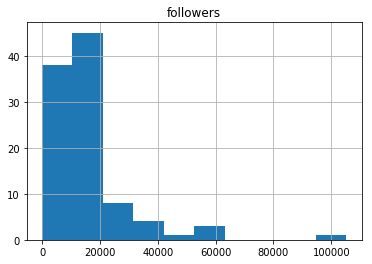

In [65]:
full_user_detail.hist(column="followers")

#### * Git development began in April 2005, 14 years ago.
#### * This graph explains that many popular users joined GitHub at later years but still they became popular.
#### * 3 Users join in 2016 or 4 years ago and became popular.
#### * This concludes that for any user who wants to be an influencer on GitHub, it is not important to join no more than 2016 or 4 years ago.  